In [1]:
import jax.numpy as np
from jax import random, grad, jit
import matplotlib.pyplot as plt

In [2]:
key = random.PRNGKey(0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


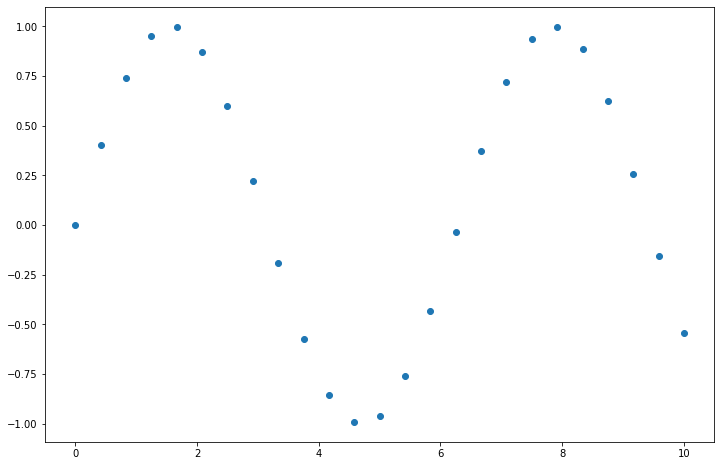

In [15]:
n = 25
x = np.linspace(0, 10, n)
y = np.sin(x)
plt.figure(figsize=(12, 8))
plt.scatter(x, y)

In [4]:
hidden = 50
key, key1, key2, key3, key4 = random.split(key, 5)
m1 = random.normal(key1, shape=(n, hidden))
b1 = random.normal(key2, shape=(hidden,))
m2 = random.normal(key3, shape=(hidden, n))
b2 = random.normal(key4, shape=(n,))
theta = [(m1, b1), (m2, b2)]

In [5]:
def relu(x): return np.max(x, 0)

In [6]:
def predict(theta, x):
    (m1, b1), (m2, b2) = theta
    x = np.reshape(x, (1, -1))
    x1 = relu(x @ m1 + b1)
    return x1 @ m2 + b2

In [7]:
def loss(theta, x, y):
    y_hat = predict(theta, x)
    return np.sqrt(np.mean((y - y_hat)**2))

In [8]:
def plot(theta, x, y):
    y_hat = predict(theta, x)
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y)
    plt.plot(x, y_hat)
    plt.title(f'loss={loss(theta, x, y):.3f}')

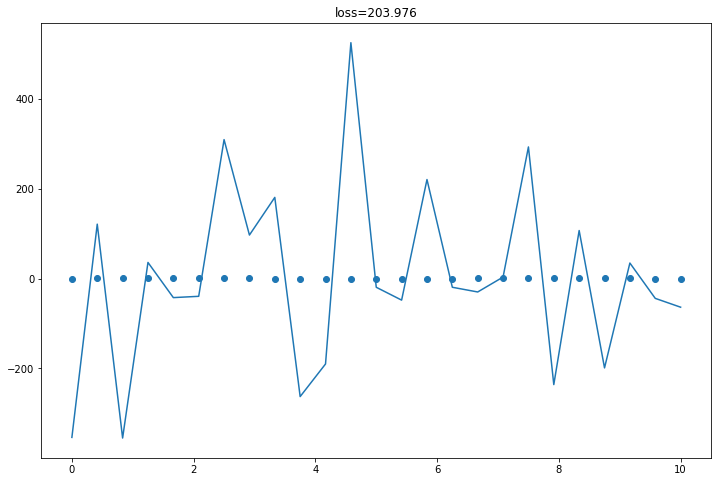

In [9]:
plot(theta, x, y)

In [10]:
@jit
def update(theta, x, y, step_size):
    grad_theta = grad(loss)(theta, x, y)
    return [((m - dm * step_size), (b - db * step_size)) for (m, b), (dm, db) in zip(theta, grad_theta)]

In [11]:
def train(theta, x, y, iterations=1, step_size=0.1):
    for _ in range(iterations):
        theta = update(theta, x, y, step_size)
    plot(theta, x, y)
    return theta

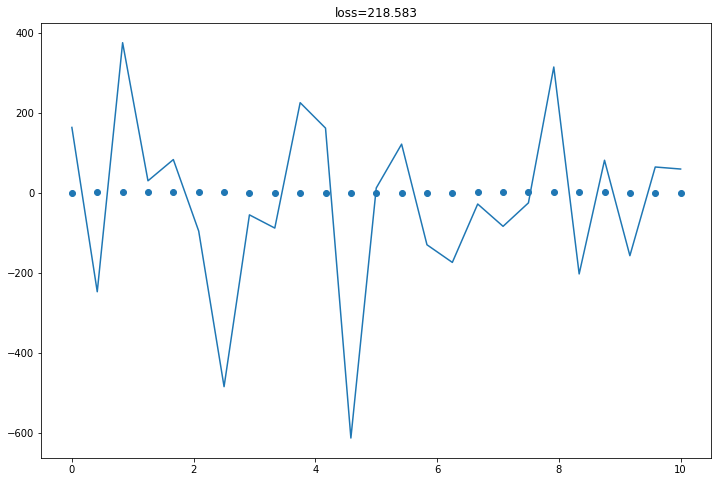

In [12]:
theta = train(theta, x, y)

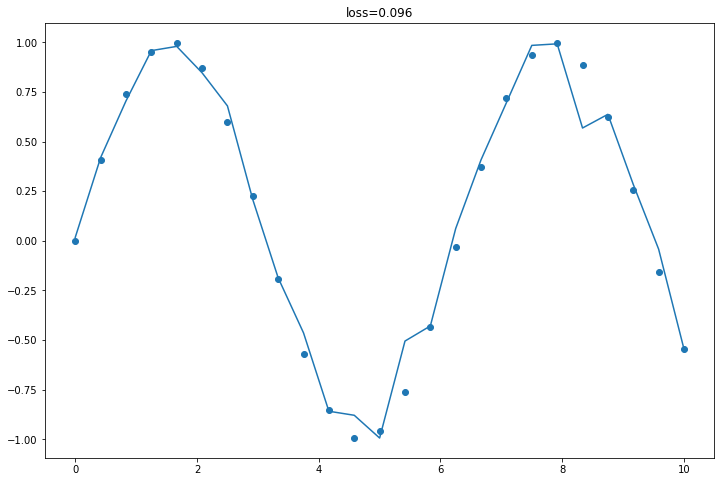

In [13]:
theta = train(theta, x, y, iterations=1000)

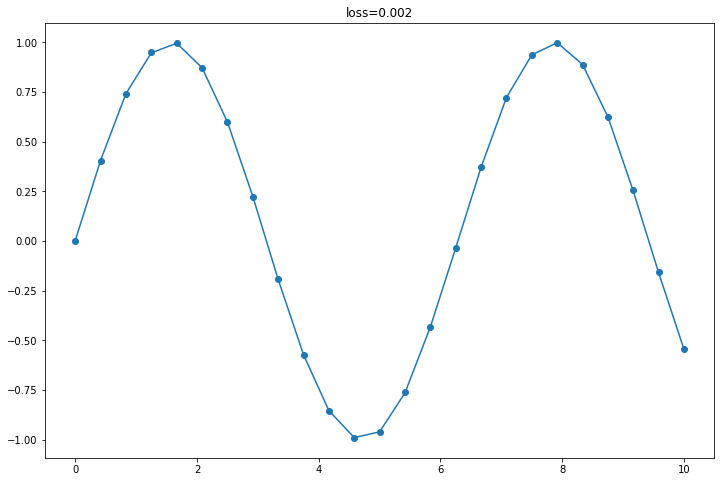

In [14]:
theta = train(theta, x, y, iterations=1000)